<a href="https://colab.research.google.com/github/maggiefoulds/Machine-Learning-Assignment/blob/main/Machine_Learning_Assignment_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment

**Dataset**:       HEART DISEASE

**Student ID**:    Maggie Foulds

**Student Name**:  s5430870


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [ ]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [ ]:
import pandas as pd

original_df = pd.read_csv('drive/MyDrive/heart-disease.csv')

# printing out dataset info
print(original_df.info())
original_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           920 non-null    int64  
 1   gender                        920 non-null    int64  
 2   chest_pain_type               920 non-null    int64  
 3   resting_blood_pressure        861 non-null    float64
 4   serum_cholesterol             890 non-null    float64
 5   fasting_blood_sugar           830 non-null    float64
 6   resting_electrocardiographic  918 non-null    float64
 7   max_heart_rate                865 non-null    float64
 8   exercise_induced_angina       865 non-null    float64
 9   st_depression                 858 non-null    float64
 10  st_segment                    611 non-null    float64
 11  num_major_vessels             309 non-null    float64
 12  thal                          434 non-null    float64
 13  class

,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,st_depression,st_segment,num_major_vessels,thal,class
0,63,1,4,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0


# Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

# Task 1.1: Data Quality Analysis


### Identifying Duplicates
Calculating the number of instances in the dataset are duplicates, and printing the duplicate rows.

In [ ]:
## printing the number of duplicate rows in the dataset
print('Number of duplicate rows: \n \n', original_df.duplicated().value_counts())
duplicated_rows = original_df[original_df.duplicated()]

## visualising the duplicated rows
duplicates = (original_df[original_df.duplicated(keep=False)])
duplicates.head()

Number of duplicate rows: 
 
 False    918
True       2
dtype: int64


,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,st_depression,st_segment,num_major_vessels,thal,class
139,58,1,3,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2
187,58,1,3,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2
604,49,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
605,49,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0


### Identifying Missing Values

Calculating the number of NaN values in each feature, then sorting them in ascending order. Visualising missing value distribution through a Seaborn displot.

Number of missing values in each feature: 


 resting_electrocardiographic      2
serum_cholesterol                30
max_heart_rate                   55
exercise_induced_angina          55
resting_blood_pressure           59
st_depression                    62
fasting_blood_sugar              90
st_segment                      309
thal                            486
num_major_vessels               611
dtype: int64


Chart visualising the distribution of missing values by feature: 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 13 to 198
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           53 non-null     int64  
 1   gender                        53 non-null     int64  
 2   chest_pain_type               53 non-null     int64  
 3   resting_blood_pressure        0 non-null      float64
 4   serum_cholesterol             50 non-null     f

<Figure size 1000x600 with 0 Axes>

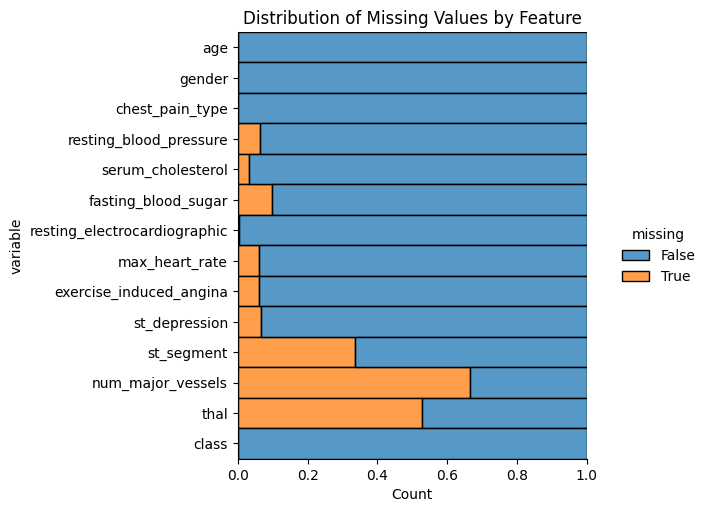

In [ ]:
## finding the sum of the missing values by feature
missing_values = original_df.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_values.sort_values(inplace=True)

print('Number of missing values in each feature: \n\n\n', missing_values)

print('\n\nChart visualising the distribution of missing values by feature: \n\n')
plt.figure(figsize=(10,6))
sns.displot(
    data=original_df.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1.25
)
plt.title('Distribution of Missing Values by Feature')

## selecting rows with more than 6 missing values
missing_rows = original_df.loc[original_df.isnull().sum(1)>6]

print(missing_rows, missing_rows.info(),'\n\n\n')

##missing_rows['class'].value_counts().plot(kind='bar', title='Class distribution of the Rows with >50% Missing Data')

### Average Values

Calculating the mean value for each continuous feature in the dataset, and the modal values for the discrete features

In [ ]:
## calculating the mean of each feature in the dataset
mean_values = original_df.mean(axis=0)
print('Mean values for each feature:\n\n', mean_values,'\n\n')

## calculating the mode of each feature in the dataset
mode_values = original_df.mode(axis=0)
print('Modal values for each feature:\n\n',mode_values)

Mean values for each feature:

 age                              53.510870
gender                            0.789130
chest_pain_type                   3.250000
resting_blood_pressure          132.132404
serum_cholesterol               199.130337
fasting_blood_sugar               0.166265
resting_electrocardiographic      0.604575
max_heart_rate                  137.545665
exercise_induced_angina           0.389595
st_depression                     0.878788
st_segment                        1.770867
num_major_vessels                 0.676375
thal                              5.087558
class                             0.995652
dtype: float64 


Modal values for each feature:

    age  gender  chest_pain_type  resting_blood_pressure  serum_cholesterol  \
0   54       1                4                   120.0                0.0   

   fasting_blood_sugar  resting_electrocardiographic  max_heart_rate  \
0                  0.0                           0.0           150.0   

   exercise_i

### Correlation Matrix

Generation of a triangular correlation matrix to visualise the correlation coefficients between each of the features in the dataset

<Axes: >

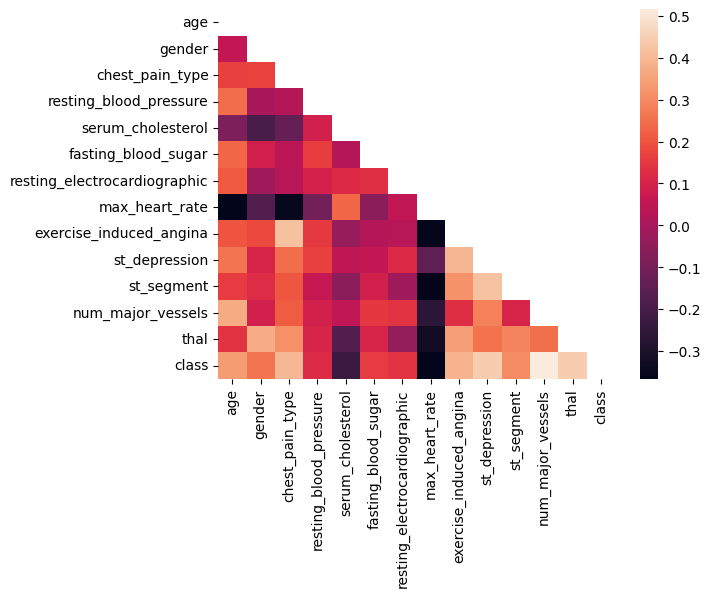

In [ ]:
## generating a correlation matrix with correlation coefficients between each feature
corr_matrix = original_df.corr()

## visualising the correlations through a triangle correlation matrix heatmap
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, mask=mask)

### Class Distribution

Calculating value counts for, and visualising, the class distribution within the dataset

0    411
1    265
2    109
3    107
4     28
Name: class, dtype: int64


<Axes: title={'center': 'Class distribution'}>

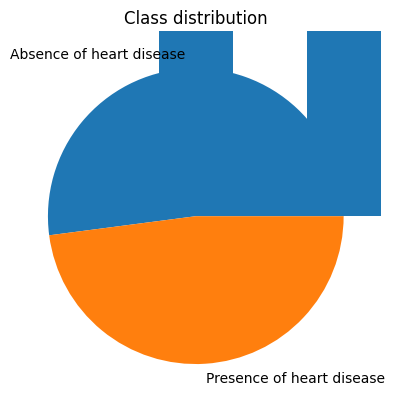

In [ ]:
## printing the sum of the instances within each class
print(original_df['class'].value_counts())
original_df['class'].value_counts().plot(kind='bar', title='Class distribution')

## generating pie chart of the dataset when converted to a binary classification
original_df['bins'] = pd.cut(original_df['class'], bins=[0,1,5], labels=['Absence of heart disease', 'Presence of heart disease'])
biclass_df = original_df.groupby('bins').size()
biclass_df.plot.pie()

### Age and Gender Distributions

Distribution of ages in the dataset


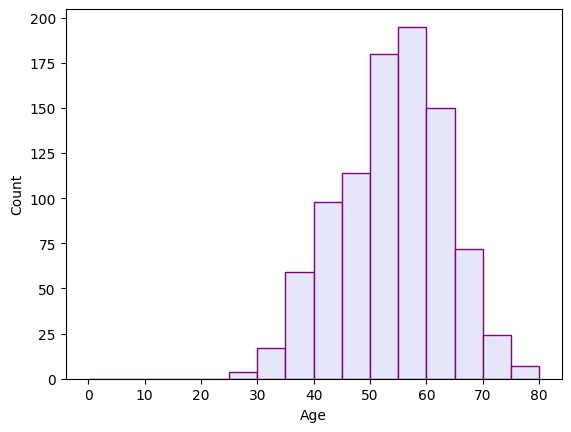

Gender distribution in the dataset


<Axes: ylabel='gender'>

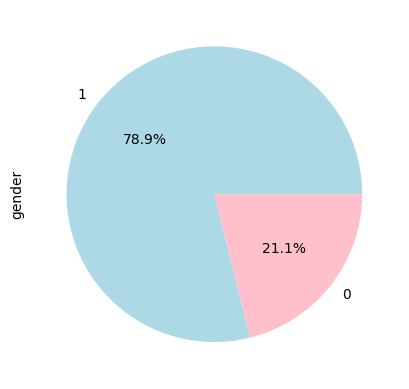

In [ ]:
## visualising the distribution of ages within the dataset in a histogram grouped in every 5 years of age
print('Distribution of ages in the dataset')
plt.hist(original_df['age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], color='lavender', edgecolor='purple')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## visualising the gender distribution within the dataset through a pie chart
print('Gender distribution in the dataset')
pie_colors = ['lightblue', 'pink']
original_df['gender'].value_counts().plot.pie(colors=pie_colors, autopct='%1.1f%%')

### Identifying Noise in the Dataset

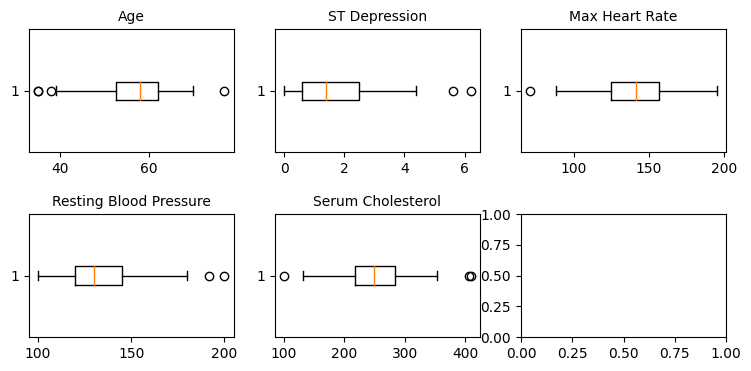

In [ ]:
filtered_data = original_df.dropna()

## generation of a bpx and whisker plot for each of the 5 continuous variables in the dataset
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9,4), sharey=False)
axs[0,0].boxplot(filtered_data['age'], vert=0)
axs[0,0].set_title('Age', fontsize=10)
axs[1,0].boxplot(filtered_data['resting_blood_pressure'], vert=0)
axs[1,0].set_title('Resting Blood Pressure', fontsize=10)
axs[1,1].boxplot(filtered_data['serum_cholesterol'], vert=0)
axs[1,1].set_title('Serum Cholesterol', fontsize=10)
axs[0,2].boxplot(filtered_data['max_heart_rate'], vert=0)
axs[0,2].set_title('Max Heart Rate', fontsize=10)
axs[0,1].boxplot(filtered_data['st_depression'], vert=0)
axs[0,1].set_title('ST Depression', fontsize=10)

fig.subplots_adjust(hspace=0.5)

## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

### Dealing with Duplicates

In [ ]:
## dropping (removing) the duplicate rows from the dataset
heart_df = original_df.drop_duplicates()

## printing the new number of duplicates, and information about the newly edited dataset
print('\n After dropping duplicate rows: \n \n',heart_df.duplicated().value_counts())
print(heart_df.info())



 After dropping duplicate rows: 
 
 False    918
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           918 non-null    int64   
 1   gender                        918 non-null    int64   
 2   chest_pain_type               918 non-null    int64   
 3   resting_blood_pressure        859 non-null    float64 
 4   serum_cholesterol             889 non-null    float64 
 5   fasting_blood_sugar           828 non-null    float64 
 6   resting_electrocardiographic  916 non-null    float64 
 7   max_heart_rate                863 non-null    float64 
 8   exercise_induced_angina       863 non-null    float64 
 9   st_depression                 856 non-null    float64 
 10  st_segment                    611 non-null    float64 
 11  num_major_vessels             309 non-null    f

### Dealing with Missing Values

In [ ]:
## dropping each of the rows with more than 50% missing data, as well as the columns with more than 30% missing data
heart_df = heart_df.drop([13,23,26,29,30,36,38,44,51,57,58,60,68,69,72,77,87,89,94,96,109,110,111,112,113,114,115,119,120,124,129,133,136,137,141,142,144,145,147,149,155,158,159,161,163,164,167,168,174,181,185,196,198])
heart_df = heart_df.drop(columns=['num_major_vessels', 'thal', 'bins'])
print(heart_df.info())

## replacing missing values with either the mean or median where appropriate
heart_df['resting_blood_pressure'] = heart_df['resting_blood_pressure'].fillna(heart_df['resting_blood_pressure'].mean())
heart_df['max_heart_rate'] = heart_df['max_heart_rate'].fillna(heart_df['max_heart_rate'].mean())
heart_df['serum_cholesterol'] = heart_df['serum_cholesterol'].fillna(heart_df['serum_cholesterol'].median())
heart_df['st_depression'] = heart_df['st_depression'].fillna(heart_df['st_depression'].median())

## forward filling the remaining missing values, in the discrete variables
col1 = ['fasting_blood_sugar']
col2 = ['resting_electrocardiographic']
col3 = ['exercise_induced_angina']
col4 = ['st_segment']
heart_df.loc[:,col1] = heart_df.loc[:,col1].ffill()
heart_df.loc[:,col2] = heart_df.loc[:,col2].ffill()
heart_df.loc[:,col3] = heart_df.loc[:,col3].ffill()
heart_df.loc[:,col4] = heart_df.loc[:,col4].ffill()

## printing the sum of null values after editing
print(heart_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 919
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           865 non-null    int64  
 1   gender                        865 non-null    int64  
 2   chest_pain_type               865 non-null    int64  
 3   resting_blood_pressure        859 non-null    float64
 4   serum_cholesterol             839 non-null    float64
 5   fasting_blood_sugar           775 non-null    float64
 6   resting_electrocardiographic  863 non-null    float64
 7   max_heart_rate                863 non-null    float64
 8   exercise_induced_angina       863 non-null    float64
 9   st_depression                 856 non-null    float64
 10  st_segment                    611 non-null    float64
 11  class                         865 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 87.9 KB
None
age          

## Exploratory Data Analysis
Looking into the demographic represented by the database, and some insights into the patients

gender
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

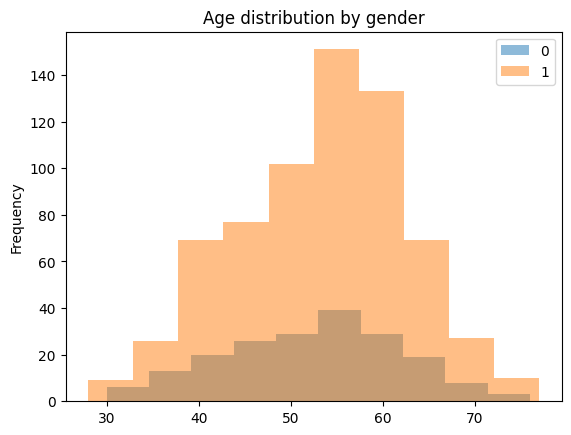

In [ ]:
## generating overlapping histogram to visualise the age distribution difference between the genders
heart_df.groupby('gender')['age'].plot(kind='hist', alpha=0.5, title='Age distribution by gender', legend=True)

gender
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: class, dtype: object

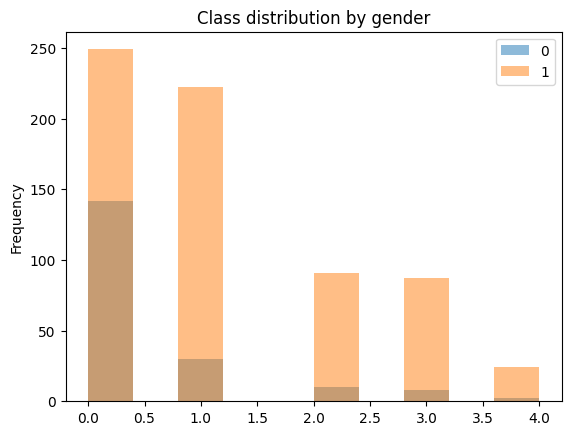

In [ ]:
## generating a histogram showing the variation in class distribution between the genders
heart_df.groupby('gender')['class'].plot(kind='hist', alpha=0.5, title='Class distribution by gender', legend=True)

Mean age of person WITH heart disease =  55.57805907172996


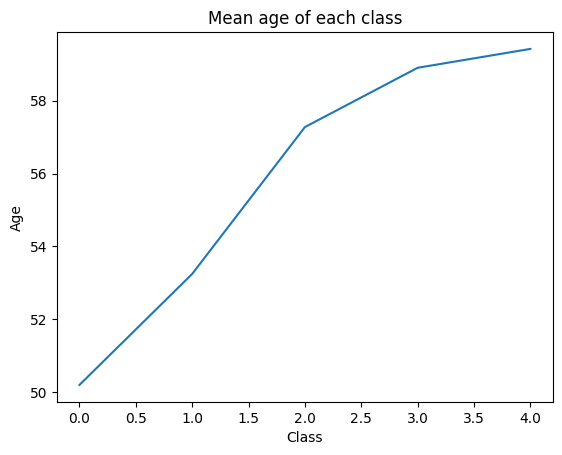

In [ ]:
## generating a line plot showing the correlation between age and classification
print('Mean age of person WITH heart disease = ', heart_df['age'][heart_df['class'] != 0].mean())

plt.plot(heart_df.groupby('class')['age'].mean())
plt.title('Mean age of each class')
plt.xlabel('Class')
plt.ylabel('Age')

df_gender_class = heart_df['class'][heart_df['gender']]

## Task 2.1 - ML Workflow to Critically Evaluate

In [ ]:
## creating a new version of the dataset with binary classification rather than multiclass
binary_df = heart_df.dropna()
binary_df.loc[binary_df['class']!=0, 'class'] = 1
binary_df.loc[binary_df['class']==0, 'class'] = 0

In [ ]:
# Dropping all rows with missing values
df = heart_df
df = df.dropna()

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=2,
                                                    stratify=None
                                                   )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 55.5


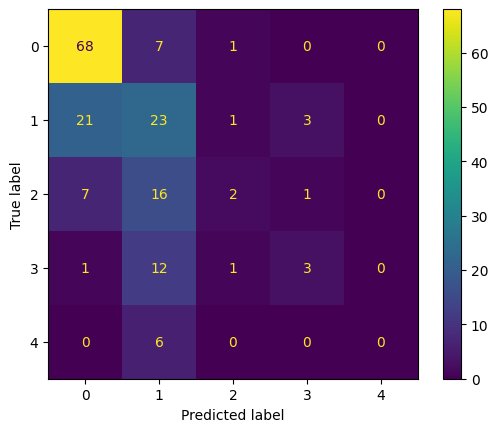

<ipython-input-172-37e33786de8a>:24: RuntimeWarning: Mean of empty slice.
  accuracy_list_logisticreg = np.append(accuracy_list_logisticreg.mean(), accuracy_list_logisticreg.std()*2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()

accuracy_list_logisticreg = np.array([])

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out performance of the model
print("Accuracy: %0.1f" % (metrics.accuracy_score(y_test, y_pred)*100))

# Creating confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualising the confusion matrix with a heatmap
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

accuracy_list_logisticreg = np.append(accuracy_list_logisticreg.mean(), accuracy_list_logisticreg.std()*2)

## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


## KNeighbours Classifier

In [ ]:
k = 15
model = KNeighborsClassifier(n_neighbors=k)

accuracy_list_knn_sklearn = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_knn_sklearn = np.append(accuracy_list_knn_sklearn, accuracy_score(y_test, y_pred))

print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list_knn_sklearn.mean(), accuracy_list_knn_sklearn.std() * 2))
print(accuracy_list_knn_sklearn)

Accuracy:  0.50 (+/- 0.06)
[0.48846154 0.46923077 0.51538462 0.46923077 0.54615385 0.5
 0.48076923 0.55       0.50384615 0.47692308 0.48461538 0.51538462
 0.49615385 0.50384615 0.58846154 0.51153846 0.50769231 0.46153846
 0.50384615 0.48076923 0.48461538 0.47307692 0.48076923 0.48461538
 0.51153846 0.49615385 0.5        0.47307692 0.49615385 0.46538462
 0.53846154 0.50769231 0.5        0.53461538 0.49615385 0.50769231
 0.45       0.5        0.51538462 0.49615385 0.49615385 0.48846154
 0.45769231 0.49230769 0.51923077 0.51153846 0.55769231 0.50384615
 0.53076923 0.49615385 0.50769231 0.5        0.46923077 0.53076923
 0.46538462 0.49615385 0.5        0.53846154 0.53846154 0.49615385
 0.44230769 0.48846154 0.50769231 0.44230769 0.51923077 0.43846154
 0.47307692 0.53846154 0.48076923 0.47692308 0.53846154 0.47692308
 0.47692308 0.47692308 0.5        0.50769231 0.49230769 0.43461538
 0.53846154 0.47692308 0.47307692 0.52307692 0.51923077 0.51153846
 0.55769231 0.43846154 0.58461538 0.507692

## Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier(max_depth=None)

accuracy_list_decisiontree = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_decisiontree = np.append(accuracy_list_decisiontree, accuracy_score(y_test, y_pred))

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
decision_tree_accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy (Testing):  %0.2f " % (decision_tree_accuracy))
print(accuracy_list_decisiontree)

[[94 22  8  8  0]
 [23 29 11  8  3]
 [ 7  6  2  7  3]
 [ 1 10  3  5  3]
 [ 0  3  0  3  1]]

Accuracy (Testing):  0.50 
[0.43076923 0.47307692 0.48461538 0.50384615 0.44230769 0.49615385
 0.47692308 0.50769231 0.5        0.50769231 0.53461538 0.49615385
 0.51153846 0.48461538 0.55384615 0.48461538 0.51538462 0.49230769
 0.50769231 0.46538462 0.48076923 0.51538462 0.50769231 0.51153846
 0.5        0.52692308 0.52692308 0.50769231 0.49230769 0.51538462
 0.5        0.49230769 0.51538462 0.48846154 0.49615385 0.46923077
 0.50769231 0.49615385 0.51923077 0.52692308 0.45384615 0.55
 0.46538462 0.51923077 0.51153846 0.45769231 0.48461538 0.51923077
 0.46538462 0.48461538 0.47307692 0.51923077 0.42692308 0.48846154
 0.48076923 0.48076923 0.45769231 0.48461538 0.46538462 0.46153846
 0.49615385 0.47307692 0.48076923 0.50769231 0.47692308 0.52307692
 0.49230769 0.49615385 0.51538462 0.5        0.51923077 0.47307692
 0.48461538 0.52307692 0.50769231 0.55384615 0.50769231 0.47307692
 0.46153846 0.45

## Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=20)

accuracy_list_random = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_random = np.append(accuracy_list_random, accuracy_score(y_test, y_pred))

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy (Testing):  %0.2f " % (random_forest_accuracy))
print(accuracy_list_random)

[[108  10   3   1   0]
 [ 26  31  10   1   0]
 [  6   8  10   1   0]
 [  6  15  11   4   1]
 [  1   2   3   1   1]]

Accuracy (Testing):  0.59 
[0.60769231 0.53846154 0.56538462 0.58076923 0.57307692 0.59230769
 0.60769231 0.59230769 0.58846154 0.56153846 0.59615385 0.59615385
 0.55384615 0.53461538 0.58461538 0.55769231 0.64230769 0.58076923
 0.61538462 0.56538462 0.6        0.51923077 0.53076923 0.58461538
 0.57692308 0.58076923 0.57307692 0.55384615 0.56538462 0.56923077
 0.56538462 0.56538462 0.55       0.58846154 0.53846154 0.54615385
 0.56153846 0.58461538 0.51538462 0.58461538 0.52692308 0.58076923
 0.52307692 0.58461538 0.56153846 0.52692308 0.62692308 0.54230769
 0.56153846 0.55       0.56153846 0.56538462 0.57692308 0.53461538
 0.6        0.55769231 0.52307692 0.60769231 0.53846154 0.55384615
 0.54615385 0.59230769 0.58461538 0.56538462 0.53846154 0.53461538
 0.60769231 0.58076923 0.63076923 0.57692308 0.56538462 0.56153846
 0.61923077 0.55384615 0.54230769 0.58076923 0.58076

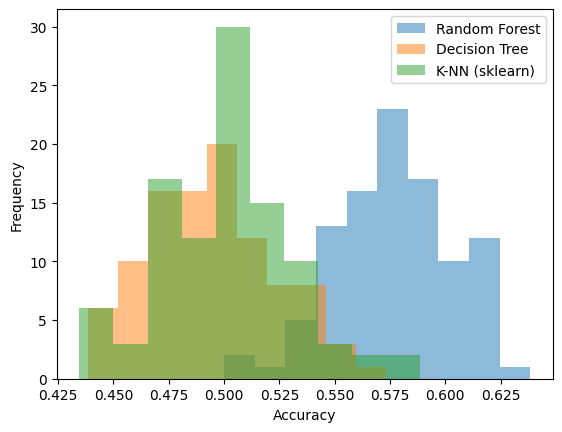

In [ ]:
plt.figure()
plt.hist(accuracy_list_random, bins=10, alpha=0.5, label='Random Forest')
plt.hist(accuracy_list_decisiontree, bins=10, alpha=0.5, label='Decision Tree')
plt.hist(accuracy_list_knn_sklearn, bins=10, alpha=0.5, label='K-NN (sklearn)')
plt.legend()
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()